<a href="https://colab.research.google.com/github/CarlosS4/Ciencia_de_Datos_AluraLatam_G9/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda3.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175


In [ ]:
formas_tiendas = {
    "Tienda 1": tienda1.shape,
    "Tienda 2": tienda2.shape,
    "Tienda 3": tienda3.shape,
    "Tienda 4": tienda4.shape
}

formas_df = pd.DataFrame(list(formas_tiendas.items()), columns=["Tienda", "Dimensiones"])

formas_df

,Tienda,Dimensiones
0,Tienda 1,"(2359, 12)"
1,Tienda 2,"(2359, 12)"
2,Tienda 3,"(2359, 12)"
3,Tienda 4,"(2358, 12)"


#Limpieza de datos para el objetivo del cliente

In [ ]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

In [ ]:
#  Verificación de datos nulos en cantidad y porcentaje

# Calcular nulos (cantidad) por tienda
# .isnull().sum() entrega cuántos valores faltan por columna en cada DataFrame
validacion_nulos = {
    "Tienda 1": tienda1.isnull().sum(),
    "Tienda 2": tienda2.isnull().sum(),
    "Tienda 3": tienda3.isnull().sum(),
    "Tienda 4": tienda4.isnull().sum()
}

# Crear DataFrame con la cantidad de nulos
# Esto genera una tabla donde las filas son columnas del dataset y las columnas son las tiendas
can_nulos = pd.DataFrame(validacion_nulos)

# Calcular porcentaje por cada tienda según su número real de filas
# len() devuelve la cantidad total de registros (filas) por tienda
total_filas = {
    "Tienda 1": len(tienda1),
    "Tienda 2": len(tienda2),
    "Tienda 3": len(tienda3),
    "Tienda 4": len(tienda4)
}

# Crear DataFrame de porcentajes
# Por cada tienda: (cantidad de nulos / total de filas) * 100
# round(2) redondea a 2 decimales para mejor presentación
porc_nulos = pd.DataFrame({
    tienda: (can_nulos[tienda] / total_filas[tienda] * 100).round(2)
    for tienda in can_nulos.columns
})

# Unir cantidad y porcentaje en una sola vista con MultiIndex
# "Cantidad" y "Porcentaje %" serán encabezados superiores
tabla_nulos = pd.concat(
    [can_nulos, porc_nulos],
    axis=1,
    keys=["Cantidad", "Porcentaje %"]
)

# Mostrar la tabla con un degradado de colores para facilitar la lectura
# YlOrRd = amarillo → naranja → rojo (más rojo = más nulos)
tabla_nulos.style.background_gradient(cmap='YlOrRd', axis=None)

In [ ]:
# Verificamos los campos por los DF
# Creamos un diccionario donde la clave es el nombre de la tienda
# y el valor es la lista de columnas de cada DataFrame.
columnas_tiendas = {
    "Tienda 1": tienda1.columns.tolist(),
    "Tienda 2": tienda2.columns.tolist(),
    "Tienda 3": tienda3.columns.tolist(),
    "Tienda 4": tienda4.columns.tolist()
}


# Se ejecuta un bucle for donde 'k' representa el nombre de la tienda (ej. "Tienda 1")
# y 'v' contiene la lista de columnas asociadas a esa tienda.
# Luego, pd.Series(v) convierte esa lista en una Serie, permitiendo que Pandas alinee correctamente los datos.
# dict agrupa las tuplas (clave, valor) generadas por el bucle en un diccionario.
# Finalmente, pd.DataFrame() toma ese diccionario y lo transforma en una tabla estructurada.

columnas_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in columnas_tiendas.items()]))




# Mostramos la tabla final con las columnas de cada tienda
columnas_df

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
0,Producto,Producto,Producto,Producto
1,Categoría del Producto,Categoría del Producto,Categoría del Producto,Categoría del Producto
2,Precio,Precio,Precio,Precio
3,Costo de envío,Costo de envío,Costo de envío,Costo de envío
4,Fecha de Compra,Fecha de Compra,Fecha de Compra,Fecha de Compra
5,Vendedor,Vendedor,Vendedor,Vendedor
6,Lugar de Compra,Lugar de Compra,Lugar de Compra,Lugar de Compra
7,Calificación,Calificación,Calificación,Calificación
8,Método de pago,Método de pago,Método de pago,Método de pago
9,Cantidad de cuotas,Cantidad de cuotas,Cantidad de cuotas,Cantidad de cuotas


In [ ]:
# Verificamos los campos por los DF
# Creamos un diccionario donde la clave es el nombre de la tienda
# y el valor es la lista de columnas de cada DataFrame.
columnas_tiendas = {
    "Tienda 1": tienda1.columns.tolist(),
    "Tienda 2": tienda2.columns.tolist(),
    "Tienda 3": tienda3.columns.tolist(),
    "Tienda 4": tienda4.columns.tolist()
}


# Se ejecuta un bucle for donde 'k' representa el nombre de la tienda (ej. "Tienda 1")
# y 'v' contiene la lista de columnas asociadas a esa tienda.
# Luego, pd.Series(v) convierte esa lista en una Serie, permitiendo que Pandas alinee correctamente los datos.
# dict agrupa las tuplas (clave, valor) generadas por el bucle en un diccionario.
# Finalmente, pd.DataFrame() toma ese diccionario y lo transforma en una tabla estructurada.

columnas_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in columnas_tiendas.items()]))


In [ ]:
# Se revisará el DataFrame uniendo las primeras filas de cada tienda.
# Usamos pd.concat() para concatenar (unir verticalmente) los primeros registros de varios DataFrames.
# Además, con .assign() agregamos una nueva columna llamada 'Tienda' que identifica de qué tienda proviene cada fila.
# En resumen, se crea una tabla combinada que permite diferenciar visualmente los datos de cada tienda.

heads = pd.concat([
    tienda1.head(),
    tienda2.head(),
    tienda3.head(),
    tienda4.head()
])

heads

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359,Tienda 2
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 2
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611,Tienda 2
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250,Tienda 2
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 2


In [ ]:
maestro_df = pd.concat([
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
], ignore_index=True)

maestro_df

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


In [ ]:
# Convertimos la columna "Fecha de Compra" a un tipo de dato datetime.
# Esto es fundamental para poder extraer día, mes y año, además de hacer
# filtros, agrupaciones o análisis temporales.
#
# - errors="coerce" convierte fechas inválidas en NaT (Not a Time), evitando errores.
# - dayfirst=True indica que el formato es DÍA/MES/AÑO (común en Chile y Latinoamérica).
maestro_df["Fecha de Compra"] = pd.to_datetime(
    maestro_df["Fecha de Compra"],
    errors="coerce",
    dayfirst=True
)

# Validamos si quedaron fechas inválidas.
# El resultado muestra cuántos valores se transformaron en NaT
# debido a errores o formatos incorrectos.
maestro_df["Fecha de Compra"].isna().sum()

np.int64(0)

In [ ]:
# Extraemos el año de la columna de fecha.
# .dt.year devuelve valores como 2023, 2024, etc.
maestro_df["Año"] = maestro_df["Fecha de Compra"].dt.year

# Extraemos el mes (número entre 1 y 12).
# Ojo: antes estabas usando .dt.year por error.
maestro_df["Mes"] = maestro_df["Fecha de Compra"].dt.month

# Extraemos el día del mes (1–31).
# Ojo: también estaba en .dt.year por error.
maestro_df["Día"] = maestro_df["Fecha de Compra"].dt.day

# Mostramos todas las columnas para verificar que se agregaron correctamente.
pd.DataFrame(maestro_df.columns)

,0
0,Producto
1,Categoría del Producto
2,Precio
3,Costo de envío
4,Fecha de Compra
5,Vendedor
6,Lugar de Compra
7,Calificación
8,Método de pago
9,Cantidad de cuotas


1. Facturación


In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

maestro_df = pd.concat([
    tienda1.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
], ignore_index=True)

maestro_df["Fecha de Compra"] = pd.to_datetime(
    maestro_df["Fecha de Compra"],
    errors="coerce",
    dayfirst=True
)

maestro_df["Año"] = maestro_df["Fecha de Compra"].dt.year
maestro_df["Mes"] = maestro_df["Fecha de Compra"].dt.month
maestro_df["Día"] = maestro_df["Fecha de Compra"].dt.day

ingreso_total_por_tienda = maestro_df.groupby('Tienda')['Precio'].sum().reset_index()
ingreso_total_por_tienda.rename(columns={'Precio': 'Ingreso Total'}, inplace=True)

# Display the DataFrame without scientific notation
pd.options.display.float_format = '{:,.0f}'.format
display(ingreso_total_por_tienda)

,Tienda,Ingreso Total
0,Tienda 1,"1,150,880,400"
1,Tienda 2,"1,116,343,500"
2,Tienda 3,"1,098,019,600"
3,Tienda 4,"1,038,375,700"


# 2. Ventas por categoría

In [6]:
ventas_por_categoria = maestro_df.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

# Opcional: ordenar para ver las categorías más populares en cada tienda
ventas_por_categoria_ordenado = ventas_por_categoria.sort_values(by=['Tienda', 'Cantidad de Ventas'], ascending=[True, False])

display(ventas_por_categoria_ordenado)

,Tienda,Categoría del Producto,Cantidad de Ventas
7,Tienda 1,Muebles,465
3,Tienda 1,Electrónicos,448
5,Tienda 1,Juguetes,324
2,Tienda 1,Electrodomésticos,312
1,Tienda 1,Deportes y diversión,284
4,Tienda 1,Instrumentos musicales,182
6,Tienda 1,Libros,173
0,Tienda 1,Artículos para el hogar,171
15,Tienda 2,Muebles,442
11,Tienda 2,Electrónicos,422


# 3. Calificación promedio de la tienda


In [8]:
calificacion_promedio_por_tienda = maestro_df.groupby('Tienda')['Calificación'].mean().reset_index()
calificacion_promedio_por_tienda.rename(columns={'Calificación': 'Calificación Promedio'}, inplace=True)

display(calificacion_promedio_por_tienda)

,Tienda,Calificación Promedio
0,Tienda 1,4
1,Tienda 2,4
2,Tienda 3,4
3,Tienda 4,4


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Calificación Promedio'].plot(kind='hist', bins=20, title='Calificación Promedio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Calificación Promedio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Calificación Promedio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tienda')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tienda', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Calificación Promedio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Tienda')):
  _plot_series(series, series_name, i)
  fig.legend(title='Tienda', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Calificación Promedio'].plot(kind='line', figsize=(8, 4), title='Calificación Promedio')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Calificación Promedio', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio_por_tienda = maestro_df.groupby('Tienda')['Costo de envío'].mean().reset_index()
costo_envio_promedio_por_tienda.rename(columns={'Costo de envío': 'Costo de Envío Promedio'}, inplace=True)

# Mostrar el resultado
display(costo_envio_promedio_por_tienda)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización del costo de envío promedio por tienda
plt.figure(figsize=(10, 6))
sns.barplot(x='Tienda', y='Costo de Envío Promedio', data=costo_envio_promedio_por_tienda, palette='viridis')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Productos más y menos vendidos

/tmp/ipython-input-2378072046.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=top_5_productos, palette='viridis')


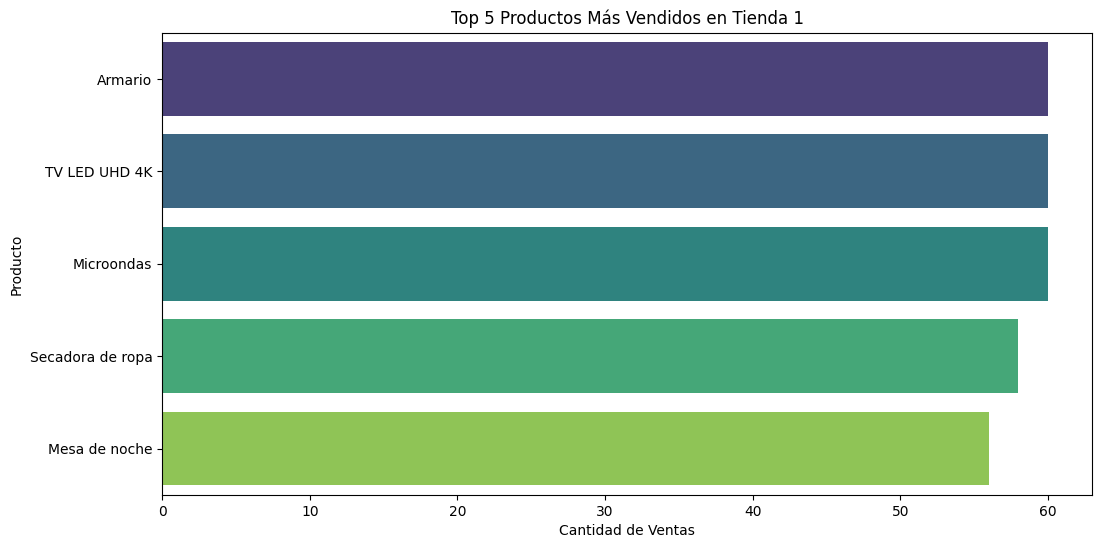

/tmp/ipython-input-2378072046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=bottom_5_productos, palette='magma')


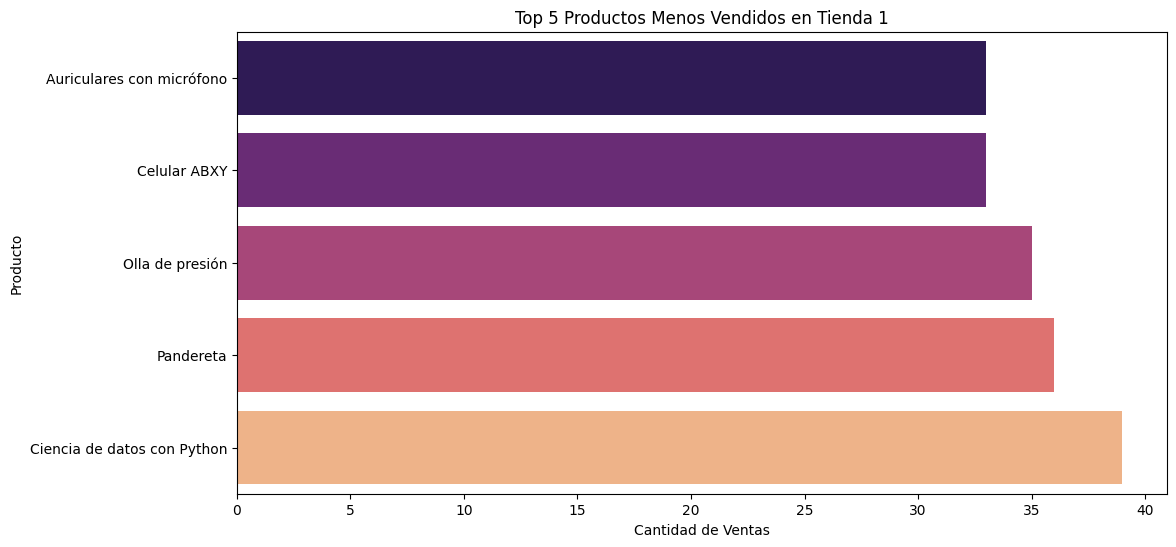

/tmp/ipython-input-2378072046.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=top_5_productos, palette='viridis')


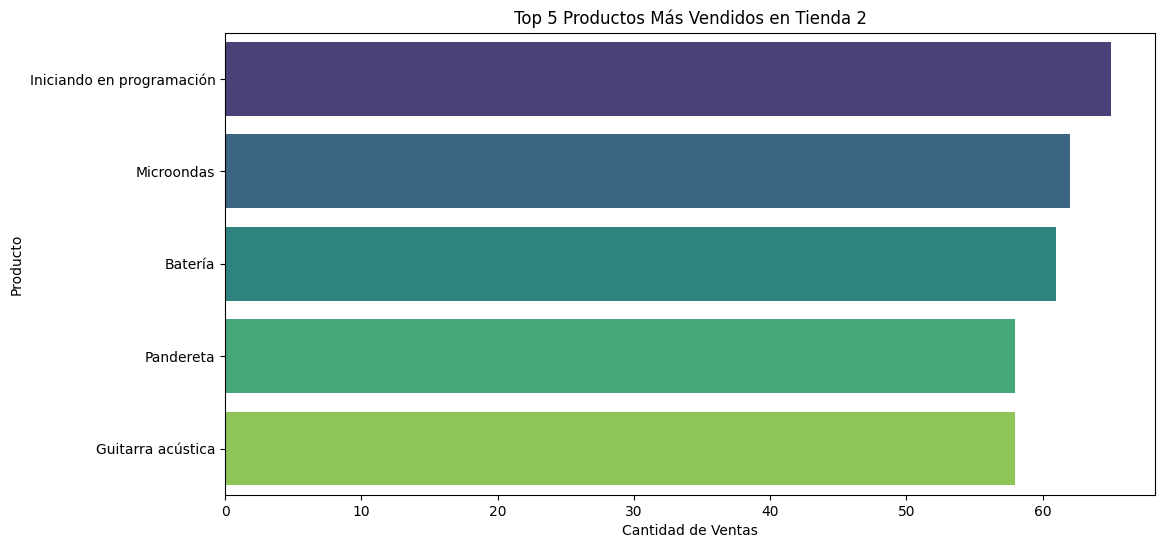

/tmp/ipython-input-2378072046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=bottom_5_productos, palette='magma')


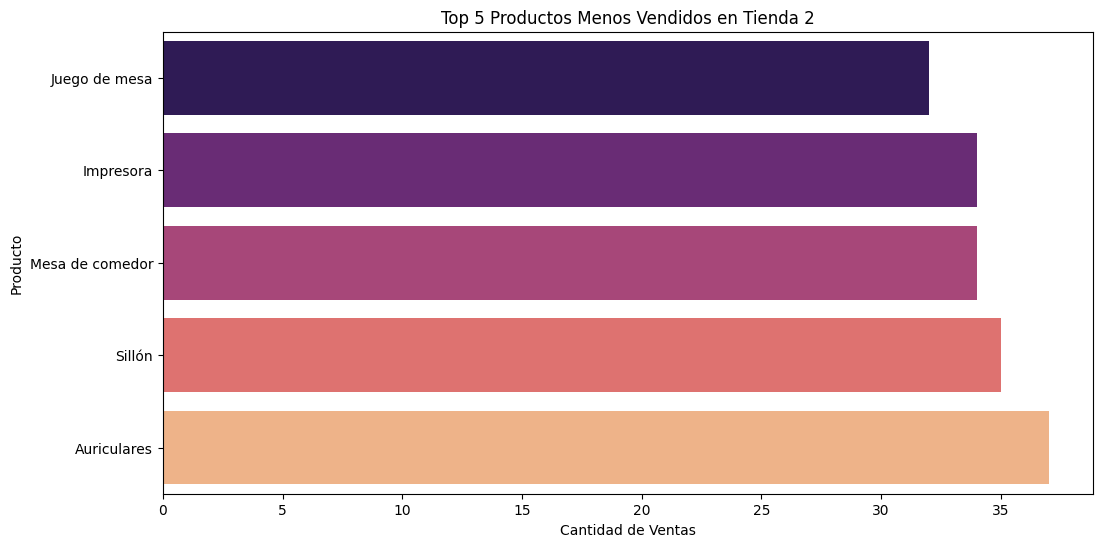

/tmp/ipython-input-2378072046.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=top_5_productos, palette='viridis')


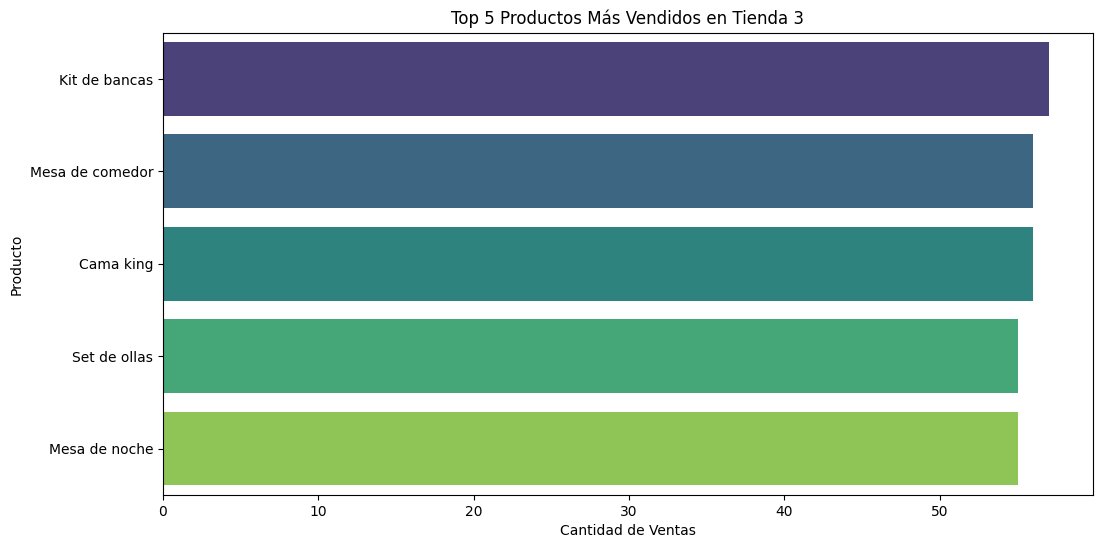

/tmp/ipython-input-2378072046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=bottom_5_productos, palette='magma')


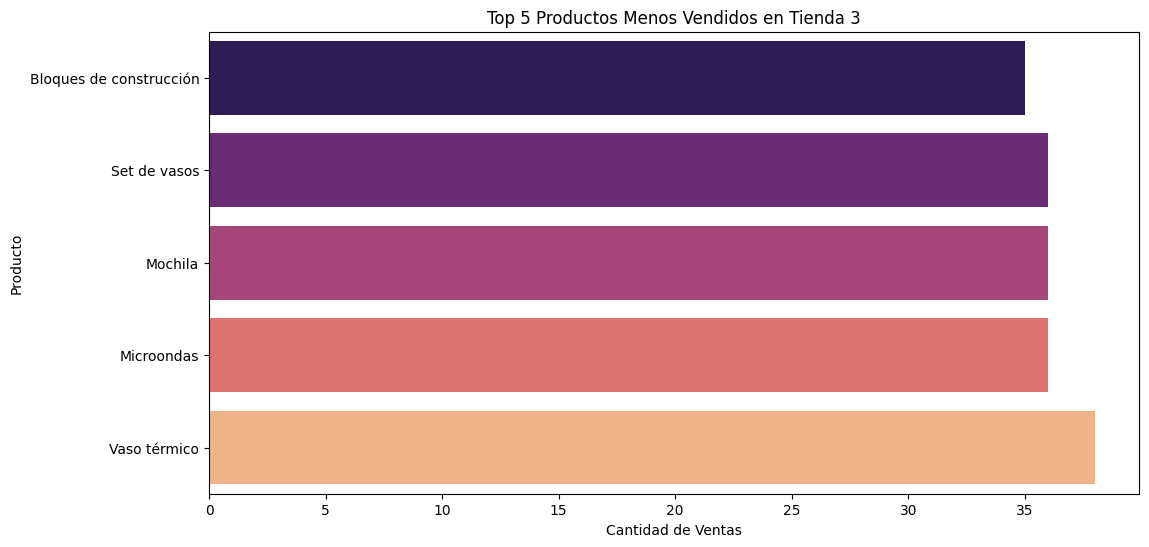

/tmp/ipython-input-2378072046.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=top_5_productos, palette='viridis')


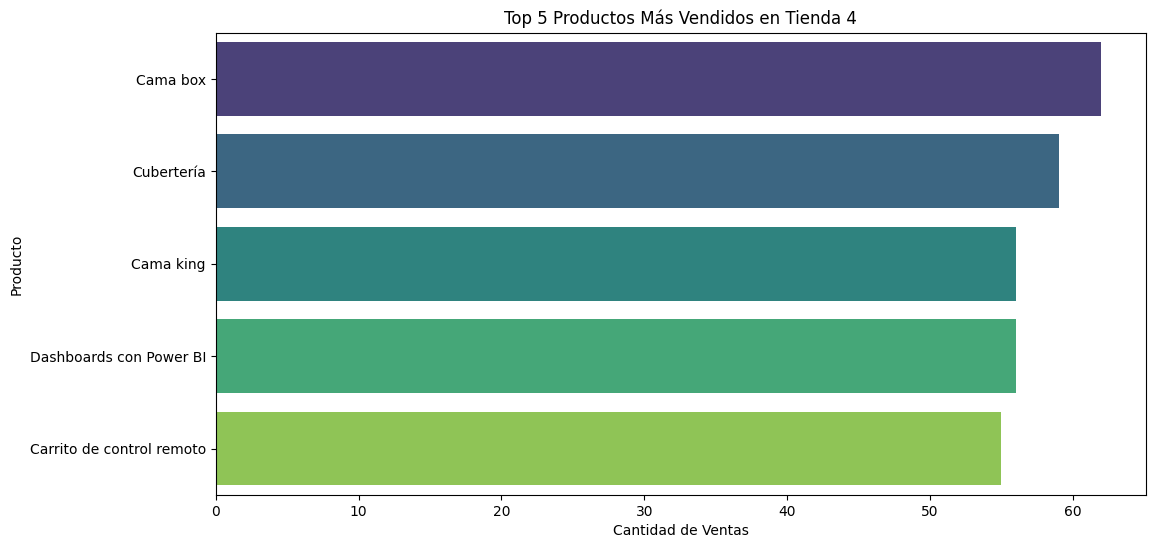

/tmp/ipython-input-2378072046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad de Ventas', y='Producto', data=bottom_5_productos, palette='magma')


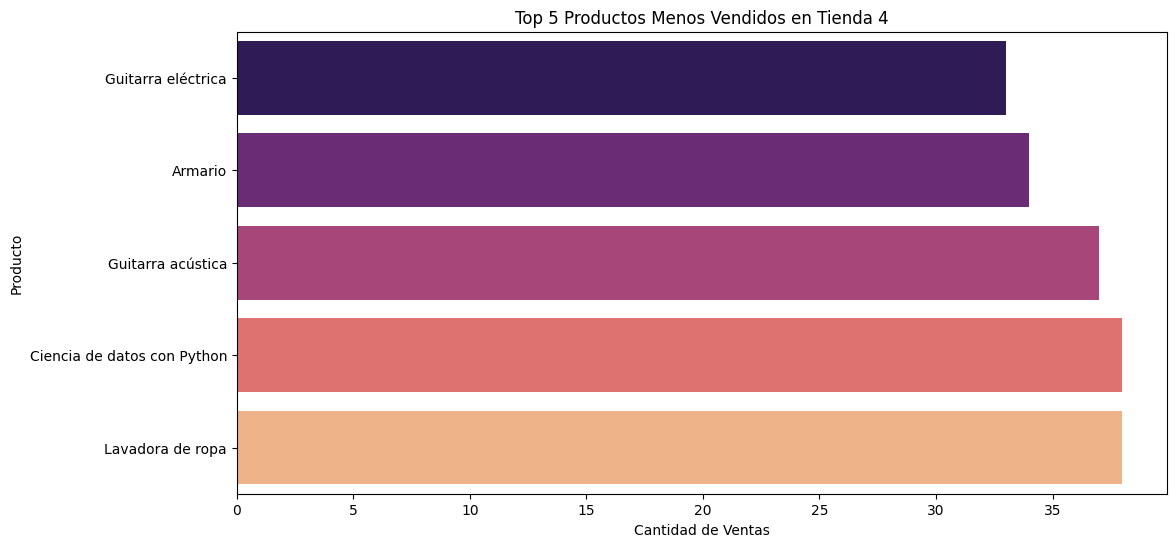

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the quantity of each product sold per store
ventas_por_producto = maestro_df.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

# Get unique store names
tindas = maestro_df['Tienda'].unique()

for tienda in tindas:
    # Filter data for the current store
    df_tienda = ventas_por_producto[ventas_por_producto['Tienda'] == tienda]

    # Get the top 5 most sold products
    top_5_productos = df_tienda.sort_values(by='Cantidad de Ventas', ascending=False).head(5)

    # Get the bottom 5 least sold products
    bottom_5_productos = df_tienda.sort_values(by='Cantidad de Ventas', ascending=True).head(5)

    # Visualization for Most Sold Products
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cantidad de Ventas', y='Producto', data=top_5_productos, palette='viridis')
    plt.title(f'Top 5 Productos Más Vendidos en {tienda}')
    plt.xlabel('Cantidad de Ventas')
    plt.ylabel('Producto')
    plt.show()

    # Visualization for Least Sold Products
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Cantidad de Ventas', y='Producto', data=bottom_5_productos, palette='magma')
    plt.title(f'Top 5 Productos Menos Vendidos en {tienda}')
    plt.xlabel('Cantidad de Ventas')
    plt.ylabel('Producto')
    plt.show()

# 5. Envío promedio por tienda